# 1. Importation et description des données

In [1]:
# Chargement des librairies necéssaire pour l'étude
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
#importation des données
import pandas
fromage = pandas.read_table("fromage.txt",sep="\t",header=0,index_col=0)

In [3]:
# affichage de la dimension de la base de donnée
fromage.shape

(29, 9)

Il s'agit d'une base de données de 29 observations et de neufs variables.

In [4]:
# Les cinq premières observations
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [5]:
# La nature des varibales
fromage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


In [6]:
fromage.dtypes

calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object

In [7]:
# Statistiques descriptives 
fromage.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


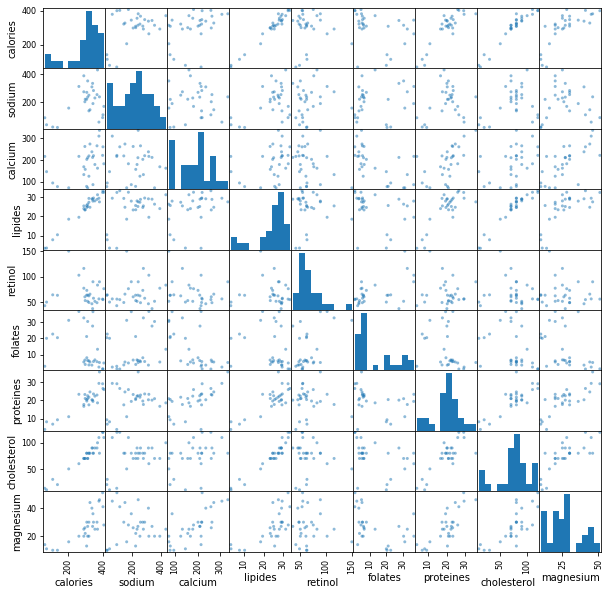

In [9]:
# graphique de croisement des variables deux à deux
scatter_matrix(fromage,figsize=(10,10))
plt.show()

Ce type de graphique n’est jamais anodin. Nous constatons par exemple que : <br>
(1) « lipides » est fortement corrélé avec « calories » et « cholestérol » (sans trop de surprises) (remarque : la même information va peser 3 fois dans l’analyse) ; 
<br>

(2) dans certaines configurations, des groupes semblent apparaître naturellement (ex. croisement de « protéines » et « cholestérol », avec une corrélation inter-groupes assez marquée).

In [10]:
# Centrage et réduction des données
fromage_cr = preprocessing.scale(fromage)

# 1. Classification Ascendante hiérarchique

In [11]:
# Génération de la matrice des liens
z = linkage(fromage_cr,method='ward',metric='euclidean')

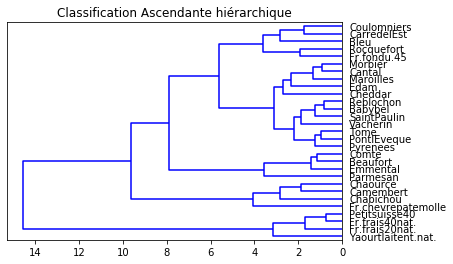

In [12]:
# affichage du dendrogramme
plt.title("Classification Ascendante hiérarchique")
dendrogram(z,labels=fromage.index,orientation="left",color_threshold=0)
plt.show()

Le dendrogramme « suggère » un découpage en 4 groupes. On note qu’une classe de fromages, les « fromages frais » (tout à gauche), se démarque fortement des autres au point qu’on aurait pu envisager aussi un découpage en 2 groupes seulement. Nous y reviendrons plus longuement lorsque nous mixerons l’analyse avec une analyse en composantes principales (ACP).

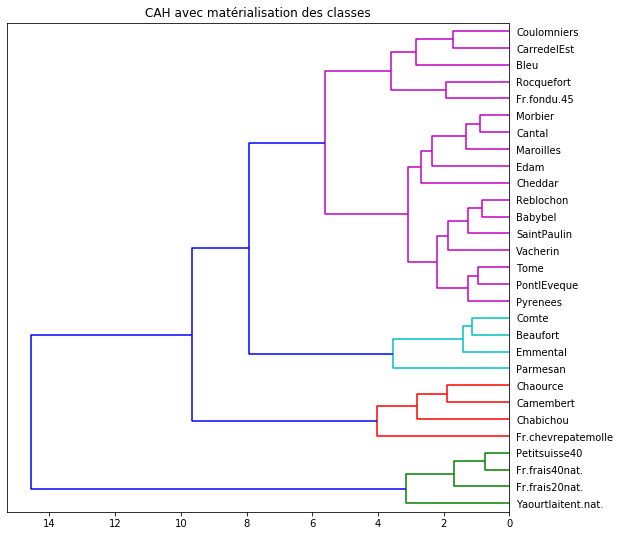

In [13]:
# Matérialisation des 4 classes (hauteur t = 7)
plt.figure(figsize=(9,9))
plt.title("CAH avec matérialisation des classes")
dendrogram(z,labels=fromage.index,orientation="left",color_threshold=7)
plt.show()

In [14]:
# Découpage à la hauteur t = 7 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(z,t=7,criterion="distance")
groupes_cah

array([4, 4, 3, 4, 2, 4, 2, 2, 4, 3, 4, 4, 3, 2, 4, 1, 1, 4, 4, 3, 1, 4,
       4, 4, 4, 4, 4, 4, 1], dtype=int32)

In [15]:
# index triés des groupes
idg = np.argsort(groupes_cah)

In [16]:
# Affichage des observations et leurs groupes
pd.DataFrame(fromage.index[idg],groupes_cah[idg])

,Fromages
1,Yaourtlaitent.nat.
1,Fr.frais20nat.
1,Petitsuisse40
1,Fr.frais40nat.
2,Fr.chevrepatemolle
2,Camembert
2,Chabichou
2,Chaource
3,Emmental
3,Parmesan


Le 1er groupe est constitué de fromages frais.<br> Le 2nd de fromages à pâte molle.<br> Le 3ème de fromages « durs ».<br> Le 4ème est un peu fourre-tout (de mon point de vue).

<br>
Pour une caractérisation à l’aide des variables de l’étude, il faut passer par des techniques statistiques univariées (simples à lire) ou multivariées (tenant compte des relations entre les variables).

# 3. K-means Clustering

In [17]:
# K-means sur les données centrées et réduites
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage_cr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
# affichage de l'inertie
kmeans.inertia_

73.27004911402575

In [20]:
# Index triés des groupes
idk=np.argsort(kmeans.labels_)

In [21]:
# Affichage des observations et de leurs groupes
pd.DataFrame(fromage.index[idk],kmeans.labels_[idk])

,Fromages
0,Fr.fondu.45
0,Babybel
0,Tome
0,Bleu
0,SaintPaulin
0,Cantal
0,Rocquefort
0,Reblochon
0,Pyrenees
0,PontlEveque


In [22]:
# Distances aux centres de classes des observations
kmeans.transform(fromage_cr)

array([[2.8747584 , 5.52563871, 4.96135531, 2.22366092],
       [0.72270816, 5.19015189, 2.57234902, 3.0178739 ],
       [2.96554549, 7.50534896, 1.00918163, 5.16141204],
       [2.05877139, 6.12458901, 3.71377754, 3.23696124],
       [3.50921027, 5.40377152, 4.92555984, 1.93343014],
       [1.22881552, 6.29601131, 2.01139577, 4.02486207],
       [3.41671778, 5.92595629, 4.30518991, 1.77869718],
       [3.45898933, 5.55487006, 4.85071534, 1.03237227],
       [2.10328745, 6.82455372, 1.90942769, 3.74803439],
       [3.52533426, 7.84252968, 1.35963218, 5.4424737 ],
       [2.49171031, 4.84286038, 4.44495956, 1.95795563],
       [2.29375693, 6.12567693, 1.384483  , 4.22922422],
       [3.48354598, 7.47787998, 1.11870963, 5.52630163],
       [5.53615119, 5.01044821, 6.86837578, 3.09730277],
       [1.81119459, 5.28233144, 4.2020413 , 2.837017  ],
       [5.92012248, 0.682889  , 7.50645539, 5.33113973],
       [5.54327791, 1.00738319, 7.1684495 , 4.5471731 ],
       [1.5123226 , 6.46351268,

<h2> 3.1. Correspondace des classes CAH vs Kmeans</h2>

In [23]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,0,4,0,0
2,0,0,0,4
3,0,0,4,0
4,13,0,2,2


<h4>Correspondance CAH – K-Means</h4>
Le groupe 1 de la CAH coïncide avec le groupe 1 des K-Means. Après, il y a certes des correspondances, mais elles ne sont pas exactes.

<h2>3.2. Utilisation de la métrique "silhouette"</h2>

In [24]:
# faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)

print(res)

[0.48626255 0.36025261 0.34540073 0.29684146 0.27856806 0.30382126
 0.30549784 0.29046613 0.23289058]


K-MEANS, à la différence de la CAH, ne fournit pas d’outils d’aide à la détection du nombre de classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par des packages dédiés. Le schéma est souvent le même : on fait varier le nombre de groupes et on surveille l’évolution d’un indicateur de qualité de la solution c.-à-d. l’aptitude des individus à être plus proches de ses congénères du même groupe que des individus des autres groupes.

Dans ce qui suit, on calcule la métrique « silhouette » pour différents nombres de groupes issus de la méthode des centres mobiles.

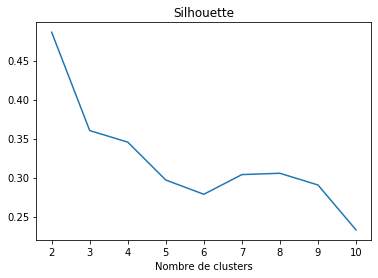

In [25]:
# graphique
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

La partition en k = 2 groupes semble la meilleure au sens de la métrique « silhouette ».

# 4. Interprétation des classes

<h2>Analyses univariées et multivariées</h2>

L’idée est de comparer les moyennes des variables actives conditionnellement aux groupes. Il est possible de quantifier globalement l’amplitude des écarts avec la proportion de variance expliquée (carré du rapport de corrélation). La démarche peut être étendue aux variables illustratives. Pour les catégorielles, nous confronterions les distributions conditionnelles. 
<br>L’approche est simple et les résultats faciles à lire. Rappelons cependant que nous ne tenons pas compte des liaisons entre les variables dans ce cas.

<h2>4.1. Statistiques comparatives</h2>

In [26]:
# moyenne par variable
m = fromage.mean()
m

calories       300.034483
sodium         210.086207
calcium        185.734483
lipides         24.158621
retinol         67.562069
folates         13.010345
proteines       20.168966
cholesterol     74.586207
magnesium       26.965517
dtype: float64

In [27]:
# TSS
TSS = fromage.shape[0]*fromage.var(ddof=0)
print(TSS)

calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


In [28]:
# Dataframe conditionnellement aux groupes
gb = fromage.groupby(kmeans.labels_)

In [29]:
# effectifs conditionnelles 
nk = gb.size()

In [30]:
# Affichage des effectifs conditionnelles
print(nk)

0    13
1     4
2     6
3     6
dtype: int64


In [31]:
# moyennes conditionnelles
mk = gb.mean()
print(mk)

     calories      sodium     calcium    lipides    retinol    folates  \
0  328.769231  274.769231  201.038462  27.115385  58.792308   7.946154   
1  101.750000   44.750000  133.750000   6.275000  55.150000  16.475000   
2  382.000000  137.333333  262.866667  29.966667  66.533333   3.416667   
3  288.000000  252.916667  110.100000  23.866667  95.866667  31.266667   

   proteines  cholesterol  magnesium  
0  20.861538    81.538462  27.076923  
1   7.200000    18.250000  11.250000  
2  28.600000   103.333333  42.500000  
3  18.883333    68.333333  21.666667  


In [32]:
# Pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2

In [33]:
# Pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

In [34]:
# Somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)

calories       209179.907825
sodium         206499.435124
calcium         83873.991415
lipides          1595.859255
retinol          6429.302378
folates          2933.405422
proteines        1115.422966
cholesterol     18516.387047
magnesium        2604.459107
dtype: float64


In [35]:
# Carré du rapport de corrélation
# variance expliquée par l'appartenance aux groupes
# pour chaque variable
R2 = BSS/TSS
print(R2)

calories       0.884291
sodium         0.624410
calcium        0.569439
lipides        0.862370
retinol        0.393279
folates        0.762275
proteines      0.822412
cholesterol    0.828880
magnesium      0.726090
dtype: float64


# 4. Analyse en Composantes Principales

In [36]:
# PCA sur les données centrées et réduites
acp = PCA(n_components=2).fit_transform(fromage_cr)

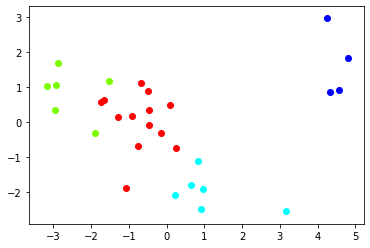

In [37]:
# Projection dans le plan factoriel avec un code couleur selon le cluster
for couleur,k in zip(["red","blue","lawngreen","aqua"],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

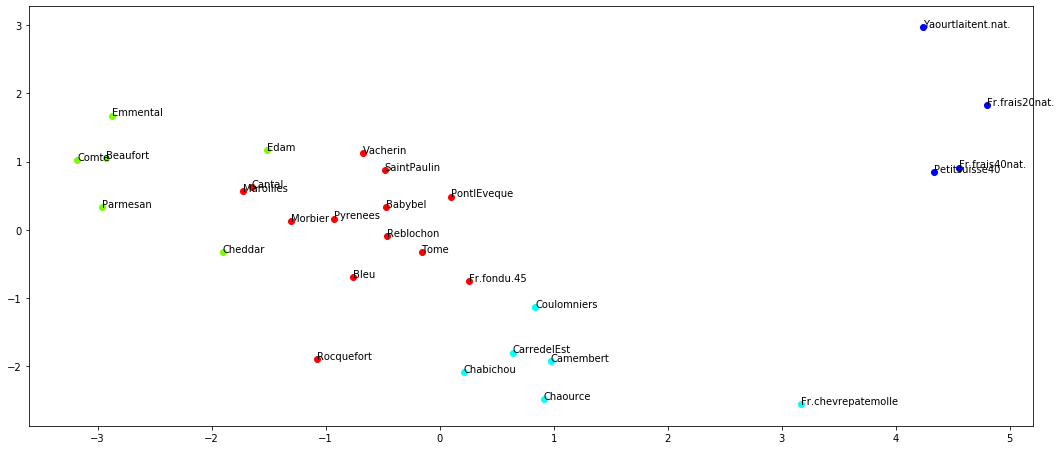

In [38]:
# Projection dans le plan factoriel avec un code couleur selon le cluster et le label des points
plt.figure(figsize=(18,7.715))
for couleur,k in zip(["red","blue","lawngreen","aqua"],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)

for i,label in enumerate(fromage.index):
    plt.annotate(label,(acp[i,0],acp[i,1]))
    
plt.show()

<h2>4.1. Constitution d'un sous ensemble sans le cluster 1</h2>

In [39]:
# Retirer des observations de groupe n°0 des k-means
fromage_subset = fromage.iloc[kmeans.labels_!=1,:]
fromage_subset.shape

(25, 9)

Nous venons de retirer 4 observations qui appartenaient au cluster n°1.

In [40]:
# Centrer et réduire le sous ensemble privé du cluster 1
fromage_subset_cr = preprocessing.scale(fromage_subset)

In [41]:
# Génération de la matrice des liens
z_subset = linkage(fromage_subset_cr,method="ward",metric="euclidean")

<h2>4.2. CAH sur le sous ensemble</h2>

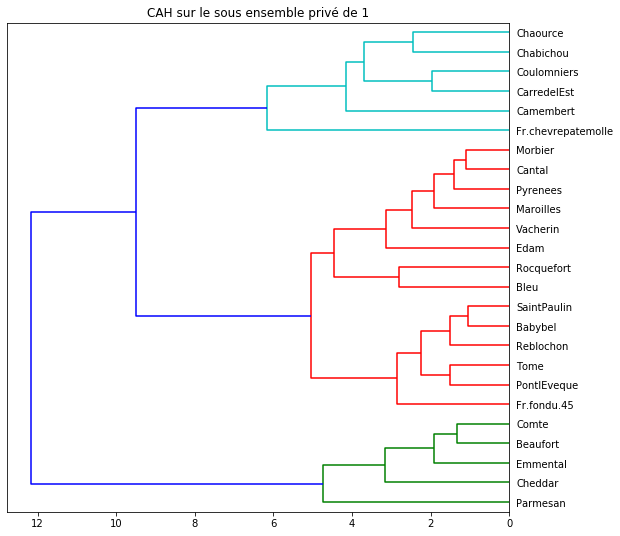

In [42]:
#CAH et affichage du dendrogramme
plt.figure(figsize=(9,9))
plt.title("CAH sur le sous ensemble privé de 1")
dendrogram(z_subset,labels=fromage_subset.index,orientation="left",color_threshold=7)
plt.show()

In [43]:
# Constitution des groupes
groupes_subset_cah = fcluster(z_subset,t=7,criterion="distance")
groupes_subset_cah

array([3, 2, 1, 2, 3, 2, 3, 3, 1, 1, 3, 2, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2], dtype=int32)

<h2>4.3. ACP sur le sous ensemble</h2>

In [44]:
# ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)

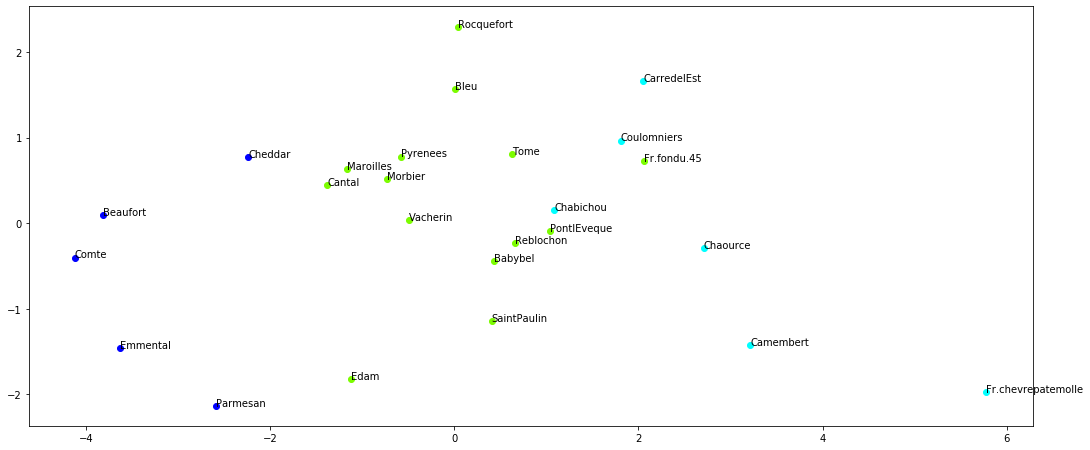

In [45]:
# Projection de l'ACP sur le plan factoriel avec un code couleur 
# selon le groupe
plt.figure(figsize=(18,7.715))
for couleur,k in zip(["blue","lawngreen","aqua"],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
    
# mettre les labels des points
for i,label in enumerate(fromage_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))

plt.show()

Les groupes sont constitués essentiellement sur le 1er facteur.<br>
Quelques fromages ont changé de camp par rapport à l’analyse précédente.